In [1]:
import pandas as pd
import numpy as np
from utiles import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
loader = DataHandler("data")
loader.load_all()
data = loader.get_all()

In [3]:
clase = "sudan 4 - 2,5%"
sudan_data = loader.get_data(clase)

target = np.where(data["clase"] == clase, 0, 1)
np.bincount(target)

array([ 40, 526])

In [4]:
std = StandardScaler()
scaled_ = std.fit_transform(data.iloc[:,:-1])

sudan_scaled = std.transform(sudan_data)
sudan_mean = pd.DataFrame(sudan_scaled).mean()

fixed_data = pd.DataFrame(scaled_) - sudan_mean

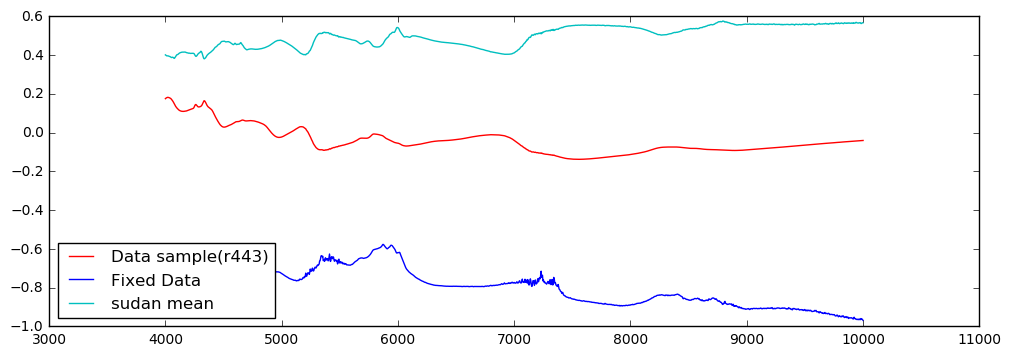

In [5]:
## plotting sample
plt.figure(figsize=(12, 4))
rnd_ind = np.random.randint(526)                # random index for sample

plt.plot(data.columns[:-1], data.iloc[rnd_ind,:-1], c="r", label="Data sample(r{})".format(rnd_ind))

plt.plot(data.columns[:-1], fixed_data.iloc[rnd_ind,:], c="b", label="Fixed Data")

plt.plot(data.columns[:-1], sudan_mean, c="c", label="sudan mean")
plt.legend(loc=3)
plt.show()

In [6]:
X_train, x_test, Y_train, y_test = train_test_split(fixed_data, target)

In [7]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import ExtraTreeRegressor

# create the RFE model and select 20 from 1557 attributes
model = LogisticRegression(class_weight="balanced", solver="liblinear")
# model = RandomForestRegressor(n_estimators=40, n_jobs=4, random_state=15)
# model = AdaBoostRegressor(n_estimators=40, random_state=15)
rfe = RFE(model, 30, step=20)
rfe = rfe.fit(X_train, Y_train)

indices = np.where(rfe.support_)

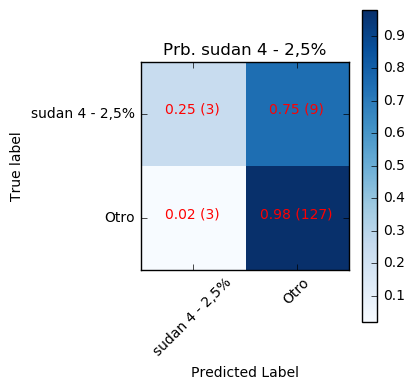

0.29353233830845782

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, n_estimators=40, n_jobs=4, random_state=15,
                             criterion="gini", class_weight={0:13, 1:1})

clf.fit(X_train.iloc[:, indices[0]], Y_train)
predicted = clf.predict(x_test.iloc[:, indices[0]])

cm = confusion_matrix(y_pred=predicted, y_true=y_test)
plot_confusion_matrix(cm, classes=[clase, "Otro"], title="Prb. {}".format(clase))
cks_ = cohen_kappa_score(predicted, y_test)
cks_